# PyTurbo_Aero 3D Design Tutorial
In this tutorial you will learn how to construct a 3D Blade by stacking 2D designs on top of each other using a stacking line defined at the leading edge, centroid or trailing edge. Lets begin! 


## Design our 2D Blade Profiles
To construct the 3D blade we build two or more key 2D Blade profiles then stack them according to the leading edge, trailing edge, or centroid. 

## Building the Hub Profile
This is the 2D blade shape located at the lowest possible radius in the turbo machine.

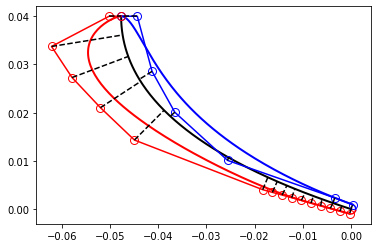

In [9]:
import sys
sys.path.insert(0,'../')
import numpy as np
from pyturbo.aero import airfoil2D
from pyturbo.helper import exp_ratio

stator_hub = airfoil2D(alpha1=0,alpha2=72,axial_chord=0.04,stagger=50) # This creates the camberline
# Building Leading Edge
stator_hub.le_thickness_add(0.04)
# Building the Pressure side 
ps_height = [0.0500,0.0200,-0.0100] # These are thicknesses 
stator_hub.ps_thickness_add(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.2400, 0.2000, 0.1600, 0.1400]
stator_hub.ss_thickness_add(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)
stator_hub.le_thickness_match()
stator_hub.te_create(radius=0.001,wedge_ss=2.5,wedge_ps=2.4)

stator_hub.flow_guidance2(10)
stator_hub.plot2D()

## Building the Mid Profile
This is the 2D blade shape located in the middle of the blade 

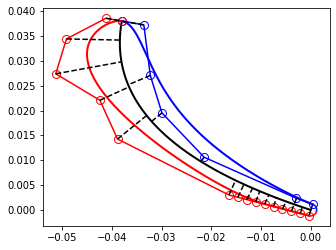

In [10]:
stator_mid = airfoil2D(alpha1=10,alpha2=72,axial_chord=0.038,stagger=45) # This creates the camberline
# Building Leading Edge
stator_mid.le_thickness_add(0.06)
# Building the Pressure side 
ps_height = [0.0900,0.0500,0.0200] # These are thicknesses normalized by the chord
stator_mid.ps_thickness_add(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.200, 0.2500, 0.1200, 0.1400]
stator_mid.ss_thickness_add(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)
stator_mid.le_thickness_match()
stator_mid.te_create(radius=0.0012,wedge_ss=3.5,wedge_ps=2.4)

stator_mid.flow_guidance2(10)
stator_mid.plot2D()

## Building the Tip Profile
This is the 2D blade shape located in the top of the blade (highest radius)

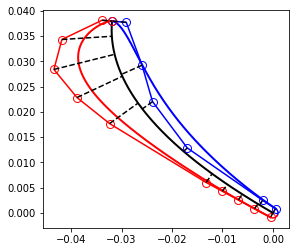

In [11]:
stator_tip = airfoil2D(alpha1=5,alpha2=60,axial_chord=0.038,stagger=40) # This creates the camberline
# Building Leading Edge
stator_tip.le_thickness_add(0.04)
# Building the Pressure side 
ps_height = [0.0900,0.0500,0.0200] # These are thicknesses normalized by the chord
stator_tip.ps_thickness_add(thicknessArray=ps_height,expansion_ratio=1.2)

ss_height=[0.200, 0.2500, 0.2000, 0.1400]
stator_tip.ss_thickness_add(thicknessArray=ss_height,camberPercent=0.8,expansion_ratio=1.2)
stator_tip.le_thickness_match()
stator_tip.te_create(radius=0.001,wedge_ss=1.5,wedge_ps=2.4)

stator_tip.flow_guidance2(5)
stator_tip.plot2D()

# Constructing the 3D Blade
Now that we have the 3 profiles, we are ready to build the full 3D Geometry

## Stacking the Geometry
The first step to being able to stack the profiles is to define an `airfoil3D` object. This class handles the stacking and manipulation of `airfoil2D` objects. 

Arguments for airfoil3D 
>Args:
>    profileArray (List[airfoil2D]): array of airfoil2D profiles
>    profile_loc (List[float]): location of the airfoil2D profiles as percentage along the height
>    height (float): height of the 3D blade normalized by the hub chord

Stacking is done in 3 ways: Leading Edge, centroid, or trailing edge. 


Equal Spacing: 100%|██████████| 20/20 [00:05<00:00,  3.80it/s]


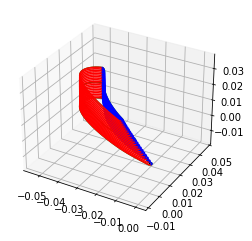

In [12]:
from pyturbo.aero import airfoil3D, stack_type
import matplotlib.pyplot as plt 

stator3D = airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.02)
stator3D.stack(stack_type.leading_edge) # Stators are typically stacked with leading edge; rotors with centroid or trailing edge
# You can also use stack_type.centroid or stack_type.trailing_edge
stator3D.create_blade(20,160,20) 
# stator3D.center_le() # Centers the leading edge at (0,0); use this only if you are simulating a single blade. Makes creating planes for data extraction easier. 
stator3D.plot3D()

Equal Spacing: 100%|██████████| 20/20 [00:05<00:00,  3.85it/s]


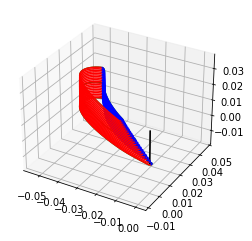

In [13]:
stator3D = airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.02)
stator3D.stack(stack_type.trailing_edge) # Stators are typically stacked with leading edge; rotors with centroid or trailing edge
# You can also use stack_type.centroid or stack_type.trailing_edge
stator3D.create_blade(20,160,20) 
# stator3D.center_le() # Centers the leading edge at (0,0); use this only if you are simulating a single blade. Makes creating planes for data extraction easier. 
stator3D.plot3D()

Equal Spacing: 100%|██████████| 20/20 [00:05<00:00,  3.87it/s]


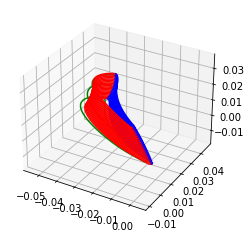

In [14]:
stator3D = airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.02)
stator3D.stack(stack_type.centroid) # Stators are typically stacked with leading edge; rotors with centroid or trailing edge
# You can also use stack_type.centroid or stack_type.trailing_edge
stator3D.create_blade(20,160,20) 
# stator3D.center_le() # Centers the leading edge at (0,0); use this only if you are simulating a single blade. Makes creating planes for data extraction easier. 
stator3D.plot3D()
# rotate the axes and update



## Adding Lean and Sweep
Lean and Sweep can be added by calling `lean_add` and `sweep`. Both lean and sweep are defined using bezier curve control points. 

> Note: You can change the twist by messing with the stagger angle of the 2D Designs 

> Another Note: The green profiles that you see are the control profiles that you specified at the hub, mid, and tip. These may not move with the design after you apply lean and sweep. 

You can use lean and sweep with each other. 

Equal Spacing: 100%|██████████| 20/20 [00:05<00:00,  3.88it/s]


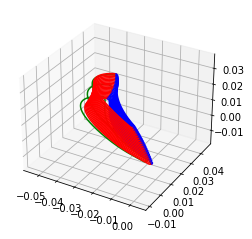

In [15]:
stator3D = airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.02)
stator3D.stack(stack_type.centroid)
stator3D.lean_add(leanX=[0,0.03,0.01], leanZ=[0.0, 0.5, 1]) # Z =1 is blade tip, Z = 0 is blade hub. The units are in percentage 
stator3D.create_blade(20,160,20) 
stator3D.plot3D()



Equal Spacing: 100%|██████████| 20/20 [00:05<00:00,  3.90it/s]


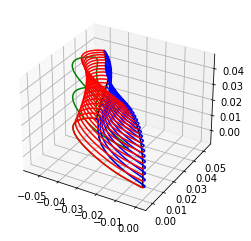

In [16]:
stator3D = airfoil3D(profileArray=[stator_hub,stator_mid,stator_tip],profile_loc=[0.0,0.5,1.0], height = 0.04)
stator3D.stack(stack_type.leading_edge) # Stators are typically stacked with leading edge; rotors with centroid or trailing edge
stator3D.sweep(sweep_y=[0,0.5,0.2], sweep_z=[0.0, 0.5, 1]) # Z =1 is blade tip, Z = 0 is blade hub. The units are in percentage 
stator3D.create_blade(20,160,20)    
stator3D.plot3D()

## Flipping and Rotating the Geometry
When are done creating the design in 3D, if you ever need to export the geometry to a mesher there can be some subtleties to work out such as the orientation of the geometry. For that reason, I've included some code to rotate the completed design. The code below shows how you can re-orient your design. 

stator3D.flip_cw()
stator3D.rotate(cx=0,cy=0,angle=90)
stator3D.plot3D()